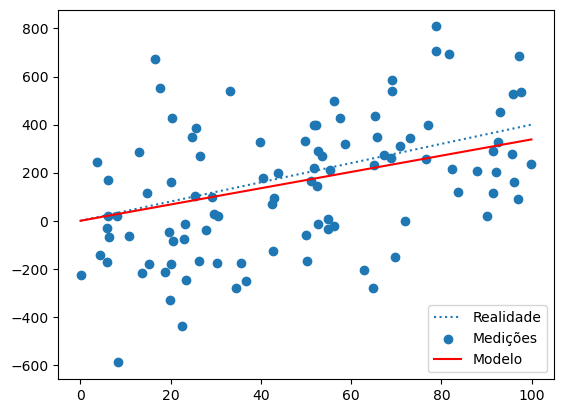

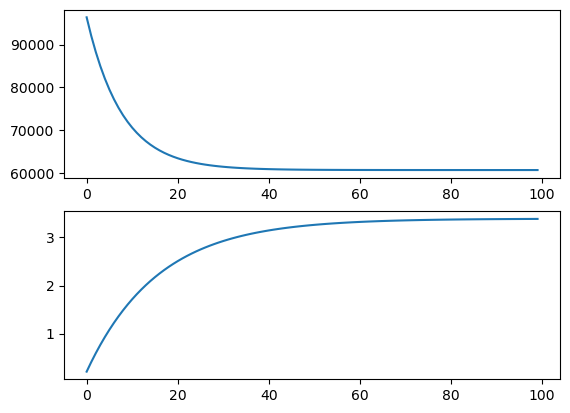

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Dados "reais"
a = 4
x = np.random.random(100) * 100
x = np.sort(x)
y = a * x

# Dados "medidos"
ym = y + np.random.randn(y.shape[0])*250

# Regressão: encontrando "modelo"
ahat = 0
alpha = 10**-5
lista_eqm = []
lista_ahat = []
for n in range(100):
    grad_acc = 0
    for i in range(len(x)):
        deidahat = 2 * x[i] * (ahat * x[i] - ym[i])
        grad_acc += deidahat/x.shape[0]
    eqm = np.mean( (ahat*x - ym)**2 )
    lista_eqm.append(eqm)
    ahat = ahat - alpha * grad_acc
    lista_ahat.append(ahat)

yhat = ahat * x

plt.figure()
plt.plot(x, y, ':', label='Realidade')
plt.scatter(x, ym, label='Medições')
plt.plot(x, yhat, 'r', label='Modelo')
plt.legend()
plt.show()

plt.figure()
plt.subplot(2,1,1)
plt.plot(lista_eqm)
plt.subplot(2,1,2)
plt.plot(lista_ahat)
plt.show()

In [65]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss(a):
    yhat = a * x
    mse = np_.mean( (yhat-ym)**2)
    return mse

dedahat = grad(loss)

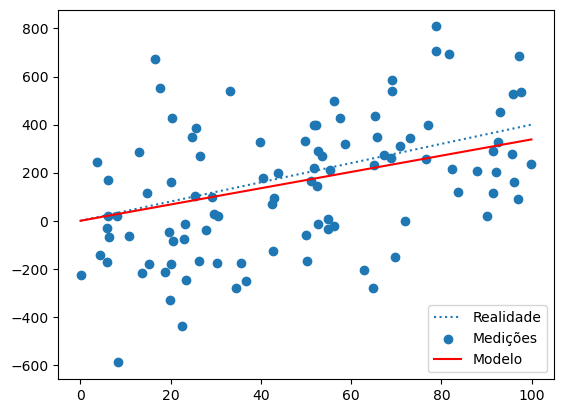

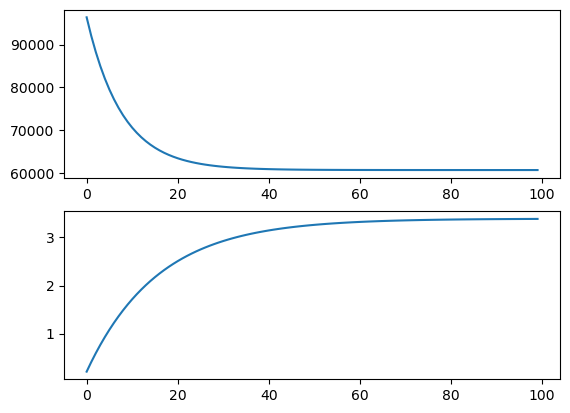

In [66]:
# Regressão: encontrando "modelo"
ahat = 0.0
alpha = 10**-5
lista_eqm = []
lista_ahat = []
for n in range(100):
    grad_ = dedahat(ahat)
    eqm = np.mean( (ahat*x - ym)**2 )
    lista_eqm.append(eqm)
    ahat = ahat - alpha * grad_
    lista_ahat.append(ahat)

yhat = ahat * x

plt.figure()
plt.plot(x, y, ':', label='Realidade')
plt.scatter(x, ym, label='Medições')
plt.plot(x, yhat, 'r', label='Modelo')
plt.legend()
plt.show()

plt.figure()
plt.subplot(2,1,1)
plt.plot(lista_eqm)
plt.subplot(2,1,2)
plt.plot(lista_ahat)
plt.show()


# Parte 1

## Exercício 1
**Objetivo: Visualizar pontos medidos e comparar com uma teoria**

Quando observamos a realidade, somos capazes de *medir* coisas. Por exemplo, podemos tentar medir a velocidade do som da seguinte forma: uma pessoa dá um grito ao mesmo tempo em que aciona um cronômetro, e outra pessoa, a alguns metros de distância, pára esse mesmo cronômetro no momento em que ouve o grito. Repetimos o experimento para várias distâncias diferentes e conseguimos, então, uma série de medidas pareadas de tempo e distância.

Se fôssemos capazes de acionar o cronômetro exatamente no tempo em que o grito é emitido, e pudéssemos parar o cronômetro exatamente no instante em que o grito é ouvido, então teríamos a seguinte situação:

Sabemos que o som se propaga em uma determinada velocidade, que é constante, e portanto o som obedece a um movimento uniforme. Vamos chamar essa velocidade de $c$. Para cada distância $\Delta s$ teríamos um tempo de propagação igual a $t = \frac{1}{c} \Delta s$.

Essa ideia de que um fenômeno obedece a uma equação (ou a um modelo, ou a uma "regra", ou uma lei) chama-se *teoria*. Então, poderíamos ter resultados *teóricos* que poderiam se parecer com:

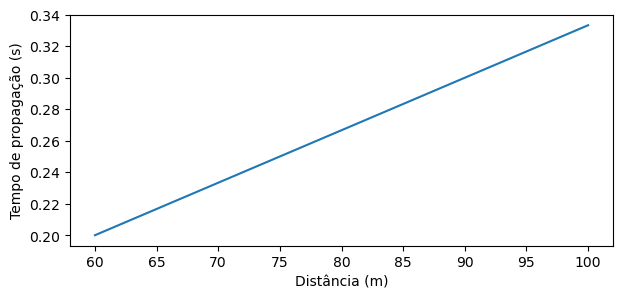

In [75]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

plt.figure(figsize=(7,3))
plt.plot(delta_s, t)
plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.show()

Porém, na realidade, nossa medição é bastante imperfeita. A primeira fonte dessas imperfeições é que, ao medirmos o tempo de propagação do som, usamos um cronômetro acionado manualmente - então, não somos capazes de acionar o cronômetro *exatamente* no instante em que o som é gerado ou recebido. Outra fonte de erro é que a velocidade do som não é *exatamente* uma constante, porque alterações como ventos e diferenças de temperatura do ar podem afetar a propagação sonora. Também, há fontes de erro que não somos exatamente capazes de prever.

Cada um desses erros gera um desvio, e cada um desses desvios tem uma distribuição diferente. Quando somamos todos esses desvios com distribuições diferentes, temos um desvio total com uma distribuição Gaussiana (lembre-se que a Normal, ou Gaussiana, é a distribuição que aparece quando somamos várias contribuições aleatórias de diferentes fontes!) com média zero e desvio padrão que não conhecemos ainda. Então, poderíamos encontrar, de fato, a seguinte situação:

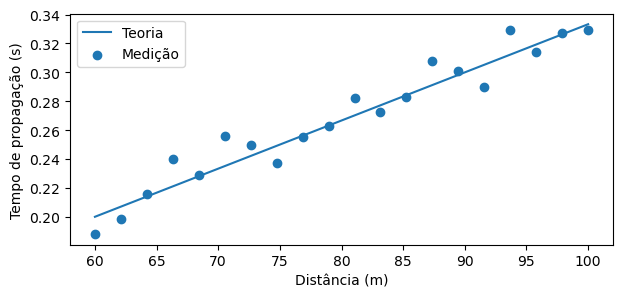

In [5]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

desvio_padrao_da_medicao = 0.01 # Desvio padrão, em segundos - esse número também é inventado!
t_medido = t + np.random.randn(20) * desvio_padrao_da_medicao

plt.figure(figsize=(7,3))
plt.plot(delta_s, t, label='Teoria')
plt.scatter(delta_s, t_medido, label='Medição')

plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.legend()
plt.show()

O problema disso tudo é que, geralmente, não conseguimos saber quais são os parâmetros "reais" do fenômeno - na verdade, não sabemos nem ao certo que ele obedece a alguma equação. Por isso, precisamos trabalhar com essa suposição sobre como o fenômeno se comporta, e por isso essa suposição é chamada de *teoria*, e não de *realidade*.

A palavra *teoria* pode ser entendida como: "uma ideia que existe dentro na nossa cabeça e que pode ou não corresponder à realidade". Claro que gostaríamos que nossa teoria se aproximasse mais da nossa realidade - realidade essa que só pode ser acessada à partir das medições. Então, vamos elaborar *hipóteses* sobre o fenômeno e usá-las para encontrar nosso modelo teórico.

Usando o código abaixo, discuta:

a) Apenas olhando a figura, é possível decidir qual das hipóteses é a que melhor explica os pontos que foram medidos? O que significa "explicar melhor"?

b) Quando aumentamos o `desvio_padrao_da_medicao`, fica mais fácil ou mais difícil decidir por uma hipótese?

c) Quando diminuimos o `desvio_padrao_da_medicao`, fica mais fácil ou mais difícil decidir por uma hipótese?

d) Quando aumentamos o número de pontos medidos, fica mais fácil ou mais difícil decidir por uma hipótese?

e) Quando diminuímos o número de pontos medidos, fica mais fácil ou mais difícil decidir por uma hipótese?

f) Se as hipóteses forem muito próximas umas das outras, é mais fácil ou mais difícil escolher uma delas?

g) Se as hipóteses forem muito próximas umas das outras, é mais relevante ou menos relevante escolher exatamente a hipótese correta?

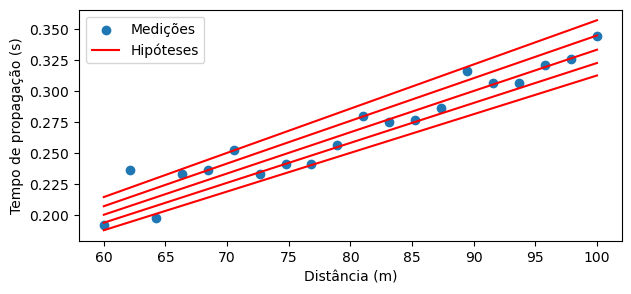

In [85]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

desvio_padrao_da_medicao = 0.01 # Desvio padrão, em segundos - esse número também é inventado!
t_medido = t + np.random.randn(20) * desvio_padrao_da_medicao

plt.figure(figsize=(7,3))
plt.scatter(delta_s, t_medido)
plt.plot(delta_s, (1/280) * delta_s, 'r')
plt.plot(delta_s, (1/290) * delta_s, 'r')
plt.plot(delta_s, (1/300) * delta_s, 'r')
plt.plot(delta_s, (1/310) * delta_s, 'r')
plt.plot(delta_s, (1/320) * delta_s, 'r')
plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.legend(['Medições', 'Hipóteses'])
plt.show()

## Exercício 2
*Objetivo: encontrar e analisar o erro de aproximação entre modelo e medidas*

Uma característica dos modelos teóricos é que eles existem somente no mundo das abstrações. É claro que, se quisermos usar nosso modelo teórico para fazer algum tipo de predição, então precisamos de um modelo teórico que se aproxime da realidade. Em outras palavras, ao compararmos dois modelos teóricos, como nas curvas abaixo, gostaríamos de escolher o modelo da curva azul, e não o da curva vermelha:

<img src="teoria_boa_vs_nao_boa.png" />

Claro que não podemos usar o critério de "olho" ou "intuição" para fazer essa escolha (até podemos no sentido de capacidade, ou mesmo de legalidade, mas com certeza não deveríamos). Ao invés disso, queremo usar um critério objetivo, isto é, encontrar um número que nos diga o quão bom é um modelo. Uma das propostas mais comuns para isso é o **erro quadrático médio**, ou EQM, que funciona da seguinte forma:

    Para cada ponto medido (x,y), com o modelo y=a*x+b:
        estime o valor fornecido pelo modelo y_est = a*x + b
        calcule o erro quadrático EQ = y_est**2
    
    Após:
        calcule o EQM como a média de todos os EQs

Outra maneira de entender o EQM é como uma equação:

$$
\text{EQM} = \frac{1}{N} \sum_{n=1}^N (y_n - (ax_n + b))^2
$$

Nesta atividade, vamos analisar como o EQM se comporta quando variamos os coeficientes do modelo.

1. No código abaixo, complete a função `EQM` para que ela calcule o EQM de um modelo linear frente a medições recebidas como entrada.
1. Na figura que é gerada, qual é o coeficiente angular teórico que leva ao menor EQM? Como ele se compara com o EQM teórico?
1. Aumente o `desvio_padrao_da_medicao`. Como isso afeta o valor mínimo do EQM?

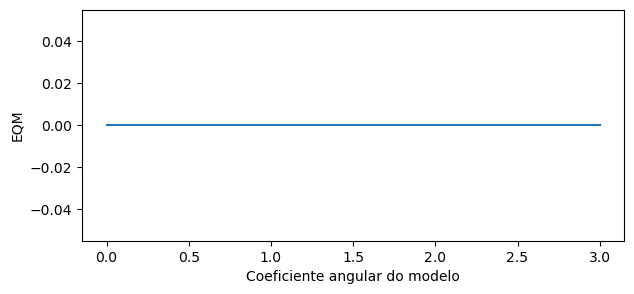

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def EQM(medidas_x, medidas_y, coef_angular_modelo, coef_linear_modelo):
    # Complete esta função

    return 0

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_linear_teorico = 0
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 0.1 # Desvio padrão, em segundos - esse número também é inventado!
medidas_y = coef_linear_teorico + coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Gerando o modelo
coef_linear_modelo = 0
coef_angular_modelo = 1.8

# Candidatos
candidatos_coef_angular = np.linspace(0,3,1000)
eqms = []
for idx, a_ in enumerate(candidatos_coef_angular):
    erro_quadratico_medio = EQM(medidas_x, medidas_y, a_, coef_linear_modelo)
    eqms.append(erro_quadratico_medio)

plt.figure(figsize=(7,3))
plt.plot(candidatos_coef_angular, eqms)
plt.xlabel('Coeficiente angular do modelo')
plt.ylabel('EQM')
plt.show()


## Exercício 3
*Objetivo: Calcular a derivada do erro em relação aos parâmetros da reta*

Em várias aplicações, sabemos de antemão que o coeficiente linear do modelo é zero. Isso significa que o erro do modelo é simplesmente:

$$
\text{EQM} = \frac{1}{N} \sum_{n=1}^N (y_n - a x_n)^2 = \frac{1}{N} \sum_{n=1}^N y_n^2 - 2 a x_n y_n + a^2 x_n^2
$$

1. Calcule a derivada de EQM em relação ao coeficiente angular $a$, isto é, calcule (no papel) $e'(a) = \frac{d\text{EQM}}{da}$. DICA: calcule a derivada para um único ponto (por exemplo, $n=1$), e então some as derivadas para todos os pontos.
1. Implemente o cálculo de $e'(a)$ na função abaixo. Quais são os valores de $e'(a)$ quando $a$ (o coeficiente angular do modelo) é muito superior ao coeficiente angular "real"? E se $a$ é inferior ao coeficiente angular "real"?

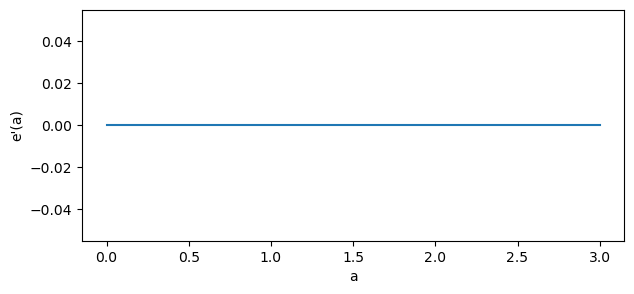

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def deqm_da(medidas_x, medidas_y, coef_angular_tentativa):
    # Complete esta função

    return 0

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 0.1 # Desvio padrão, em segundos - esse número também é inventado!
medidas_y = coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Gerando o modelo
coef_angular_modelo = 1.8

# Candidatos
candidatos_coef_angular = np.linspace(0,3,1000)
eqms = []
for idx, a_ in enumerate(candidatos_coef_angular):
    erro_quadratico_medio = deqm_da(medidas_x, medidas_y, a_)
    eqms.append(erro_quadratico_medio)

plt.figure(figsize=(7,3))
plt.plot(candidatos_coef_angular, eqms)
plt.xlabel('a')
plt.ylabel("e'(a)")
plt.show()


# Exercício 4
*Objetivo: entender o processo de descida pelo gradiente*

Partindo de um modelo linear com coeficiente angular $a$, podemos estimar um novo modelo usando:

$a_{\text{novo}} = a_{\text{atual}} + \alpha e'(a)$, onde $\alpha$ é um valor pequeno e positivo como $0.01$.

1. O modelo com coeficiente linear $a_{\text{novo}}$ deve ter EQM maior ou menor que o modelo com $a_{\text{atual}}$?
1. Como poderíamos mudar o procedimento de estimativa de forma que o modelo novo tenha EQM menor que o modelo antigo?
1. Usando as funções que você já implementou, complete a função `melhorar_modelo` no código abaixo de forma a implementar o cálculo de um $a_{\text{novo}}$.
1. Aplicando sucessivamente a função melhorar_modelo, verifique se você consegue aproximar o coeficiente angular teórico dos dados:

In [17]:
def melhorar_modelo(medidas_x, medidas_y, alpha, a_atual):
    a_novo = a_atual #Modifique isso 
    return a_novo

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 0.5 # Desvio padrão
medidas_y = coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Buscar sucessivamente por coeficientes angulares
a_ = 5.0 # Esse é o coeficiente angular tentativa
alpha = 0.1
for _ in range(100):
    a_ = melhorar_modelo(medidas_x, medidas_y, alpha, a_)

print("Coeficiente angular encontrado:", a_)
print("Coeficiente angular real:", coef_angular_teorico)

Coeficiente angular encontrado: 5.0
Coeficiente angular real: 1.7


## Exercício 5
*Objetivo: estimar um coeficiente angular em dados reais*

Neste experimento, estimaremos a aceleração da gravidade ($g$). O experimento funciona da seguinte forma:

* Sabemos que o tempo de queda $t$ de um objeto que cai de uma altura $h$ é dado por $t=\sqrt{\frac{2h}{g}}$.
* Isso significa que $t^2 = \frac{2}{g} h$
* Então, se assumirmos que $y=t^2$ e $x=h$, podemos encontrar uma reta $y=ax$ onde $a=\frac{2}{g}$.

O procedimento experimental, portanto, é:

1. Escolha um objeto que pode ser jogado sem quebrar (por exemplo, uma borracha).
1. Solte o objeto de uma altura conhecida $h$ e meça o tempo de queda $t$ usando um cronômetro (pode ser, por exemplo, o cronômetro do celular)
1. Anote a altura e o tempo de queda.
1. Repita o procedimento até juntar algumas dezenas de pontos. Compartilhe suas medições com o restante da turma!!!
1. Calcule $y=t^2$ para todos os seus pontos
1. Use o procedimento que fizemos no exercício anterior para estimar o valor do coeficiente $a$ no modelo linear
1. À partir do coeficiente $a$, calcule o valor da aceleração da gravidade usando $a=\frac{2}{g}$.

Quanto vale a aceleração da gravidade $g$ na sua sala de aula?

# Parte 2

## Usar autograd para modelar sistema de classificação usando EQM

## Mudar o critério do erro para min-max

## Mudar o critério do erro para máxima margem

## Visualizar os diferentes classificadores obtidos

# Parte 3

## Aplicar essa ideia em um problema de classificação real: separar treino-teste

## Avaliar classificador em termos de accuracy

## Usar o critério de Entropia de Shannon para melhorar o classificador


# Parte 4

## Jogar cara-a-cara ou semelhante

## Usar o critério de Entropia de Shannon para jogar cara-a-cara

## Usar Sklearn para ganhar o cara-a-cara avaliando as features mais relevantes para classificação

## Usar Sklearn para montar uma árvore de decisão em um problema real

## Avaliar a árvore de decisão em termos de accuracy para o problema real

## Comparar desempenho da árvore com desempenho do classificador linear

# Projeto

## Em um dataset, usar regressão linear para encontrar quais são as features mais relevantes